In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/muham/Desktop/AI projects/heart_disease_patients/heart_disease_patients.csv')
data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


In [4]:
data = data.drop(['id'], axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,1,1,145,233,1,2,150,0,2.3,3
1,67,1,4,160,286,0,2,108,1,1.5,2
2,67,1,4,120,229,0,2,129,1,2.6,2
3,37,1,3,130,250,0,0,187,0,3.5,3
4,41,0,2,130,204,0,2,172,0,1.4,1


In [5]:
data.shape

(303, 11)

In [6]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
scaled_data = stdsc.fit_transform(data)

In [7]:
scaled_data[:5]

array([[ 0.94872647,  0.68620244, -2.25177456,  0.75752504, -0.2649003 ,
         2.394438  ,  1.01668424,  0.01719733, -0.69663055,  1.08733806,
         2.27457861],
       [ 1.39200191,  0.68620244,  0.87798549,  1.61121989,  0.76041519,
        -0.41763453,  1.01668424, -1.82190531,  1.43548113,  0.39718162,
         0.64911323],
       [ 1.39200191,  0.68620244,  0.87798549, -0.6652997 , -0.34228261,
        -0.41763453,  1.01668424, -0.90235399,  1.43548113,  1.34614673,
         0.64911323],
       [-1.93256387,  0.68620244, -0.16526786, -0.0961698 ,  0.06397448,
        -0.41763453, -0.99674925,  1.63735918, -0.69663055,  2.12257273,
         2.27457861],
       [-1.48928843, -1.4572959 , -1.20852121, -0.0961698 , -0.82592199,
        -0.41763453,  1.01668424,  0.98053681, -0.69663055,  0.31091206,
        -0.97635214]])

In [8]:
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352


### Hierarchial Cluster

#### Compute a distance matrix for all examples

In [9]:
from scipy.spatial.distance import pdist
data_pist = pdist(scaled_data, metric='euclidean')
data_pist[:5]

array([5.54313648, 5.29439852, 5.3991295 , 5.71643092, 5.42456867])

In [10]:
from scipy.cluster.hierarchy import linkage
data_linkage = linkage(data_pist,
                       method='complete',
                       metric='euclidean')
data_linkage

array([[1.97000000e+02, 2.17000000e+02, 2.45741485e-01, 2.00000000e+00],
       [2.40000000e+01, 6.20000000e+01, 3.62204235e-01, 2.00000000e+00],
       [1.34000000e+02, 2.55000000e+02, 4.28612549e-01, 2.00000000e+00],
       ...,
       [5.92000000e+02, 5.99000000e+02, 7.81041297e+00, 4.70000000e+01],
       [6.01000000e+02, 6.02000000e+02, 9.32939524e+00, 2.99000000e+02],
       [5.75000000e+02, 6.03000000e+02, 9.89823099e+00, 3.03000000e+02]])

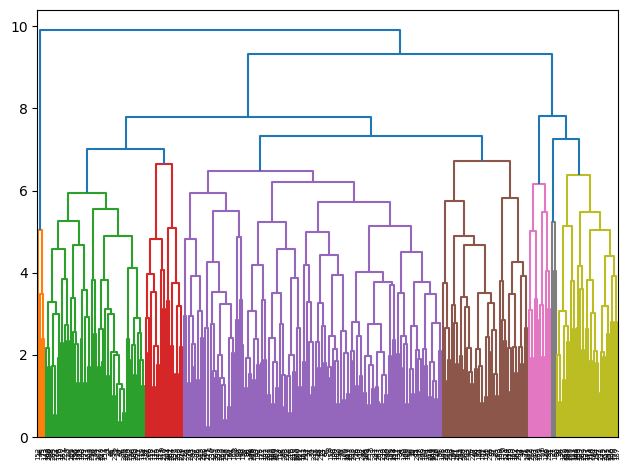

In [11]:
from scipy.cluster.hierarchy import dendrogram
dendr = dendrogram(data_linkage, 
                       labels=scaled_data.index)
plt.tight_layout()
plt.show()

#### Agglomerative Clustering

In [12]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=9,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(scaled_data)
print(f'Cluster labels: {labels}')

Cluster labels: [5 3 3 2 2 2 4 3 2 0 2 8 0 2 5 2 2 2 2 2 3 8 2 2 3 2 2 6 2 1 8 0 2 2 2 2 1
 3 3 0 1 2 8 5 8 2 2 3 7 2 2 2 2 2 3 3 2 2 2 3 3 2 3 8 2 3 3 2 4 2 8 5 1 2
 2 7 3 8 2 3 1 8 2 4 2 2 2 8 8 8 2 6 2 2 8 2 3 4 2 2 2 2 8 0 2 2 2 2 3 2 3
 0 2 0 1 2 5 2 0 3 0 4 2 1 5 2 4 1 2 0 2 2 2 3 2 8 1 1 1 2 2 8 5 3 3 2 1 2
 2 2 5 2 7 3 3 1 3 2 2 2 5 3 2 2 5 2 2 8 3 2 1 3 4 7 3 1 5 3 2 5 2 3 2 6 8
 8 2 1 8 3 2 1 0 1 1 3 5 2 2 8 2 4 5 8 2 3 3 3 2 4 2 2 2 4 2 2 2 2 1 2 2 2
 2 1 3 2 2 8 3 3 2 4 2 3 8 3 0 2 2 2 2 2 2 2 0 1 2 3 2 5 1 1 1 8 2 2 0 1 8
 2 2 8 8 2 3 3 0 1 2 2 3 3 3 0 2 8 8 2 2 0 3 2 0 2 2 1 4 2 2 2 3 2 1 3 0 2
 1 0 2 1 1 2 2]


#### K-Means++

In [13]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=123)
    km.fit(scaled_data)
    distortions.append(km.inertia_)

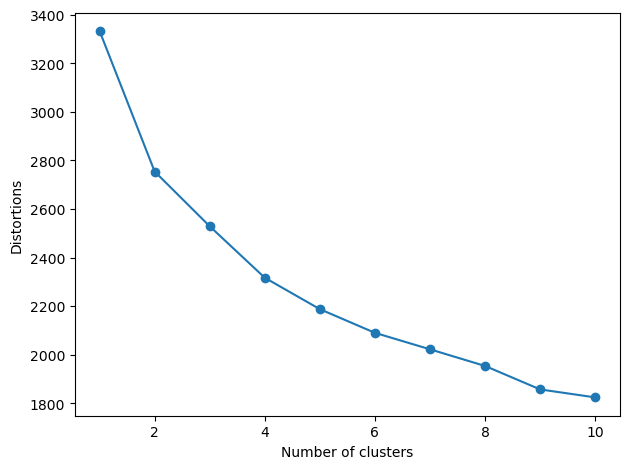

In [14]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(scaled_data)

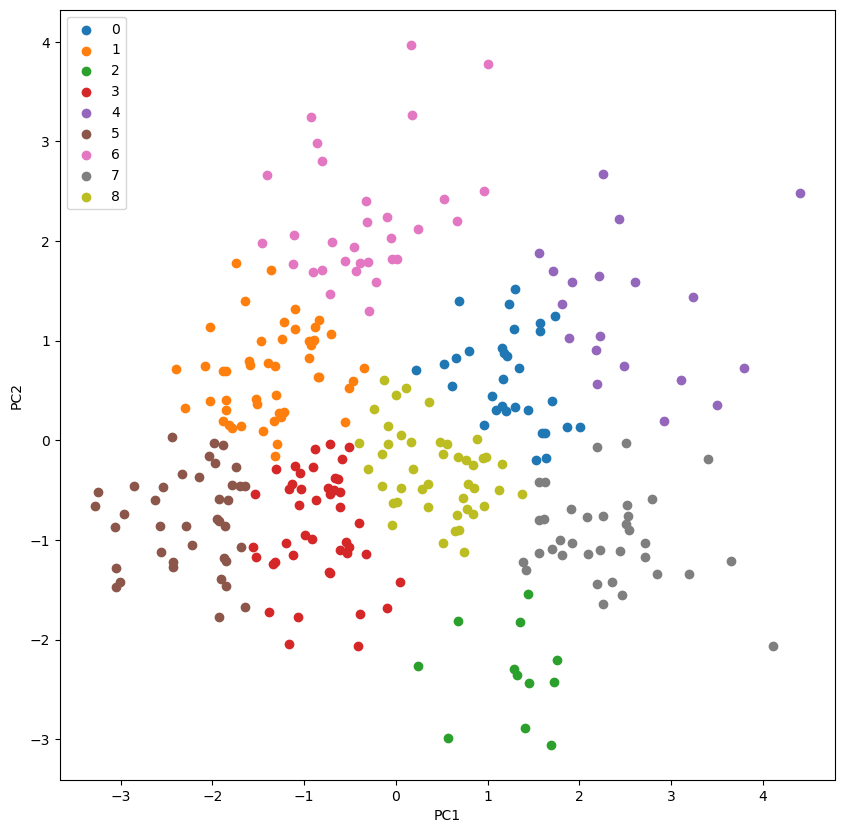

In [18]:
model = KMeans(n_clusters=9,
               init="k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label==i, 0], data[label==i, 1], label=i)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=5,
            init='pca',
            method='exact',
            random_state=123)
x_digits_tsne = tsne.fit_transform(scaled_data) 

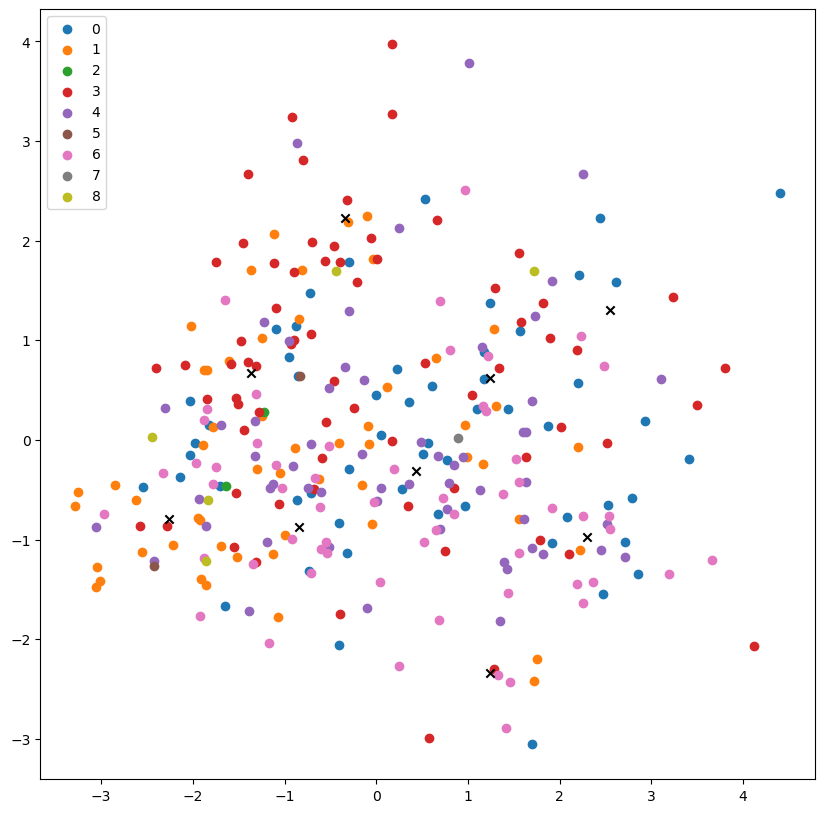

In [20]:
centers = np.array(model.cluster_centers_)
model1 = KMeans(n_clusters=9, 
                init = "k-means++")
label = model.fit_predict(x_digits_tsne)


plt.figure(figsize=(10,10)) #.gca(projection='3d')
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.legend()
plt.show()

In [ ]:
### Check Anomalies

In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test = train_test_split(scaled_data, 
                                   test_size=0.3, 
                                   random_state=123)

In [33]:
iforest = IsolationForest(max_samples=100, 
                          n_jobs=-1, 
                          random_state=123)
anom_det_fit = iforest.fit(scaled_data)
anom_det_pred = iforest.predict(scaled_data)
anom_det_score = iforest.decision_function(scaled_data)

In [35]:
anom_det_pred.shape

(303,)

In [36]:
scaled_data['scores']=anom_det_score
scaled_data['anomaly']=anom_det_pred
scaled_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,scores,anomaly
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.103927,-1
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,0.009565,1
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,0.041742,1
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.091993,-1
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.022293,-1


In [39]:
# Replace Yes: -1 and No: 1
scaled_data['anomaly'] = scaled_data['anomaly'].replace([-1, 1], ['Yes','No'])

In [40]:
scaled_data['anomaly'].value_counts()

No     183
Yes    120
Name: anomaly, dtype: int64